In [1]:
import numpy as np
from matplotlib import pyplot as plt
from gwaxion import physics

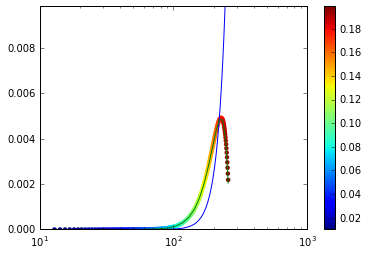

In [3]:
mbh_msun = 50
chi = 0.7
l, m = 1, 1
alphas = np.arange(0.01, 0.2, 0.001)
h0rs = []
fgws = []
for alpha in alphas:
    cloud = physics.BosonCloud.from_parameters(l, m, 0,  m_bh=mbh_msun, chi_bh=chi, alpha=alpha)
    h0rs.append(cloud.gw.h0r)
    fgws.append(cloud.fgw)
    
# analytic prediction for h0
def h0r_approx(alpha, r=1.):
    bhb = physics.BlackHoleBoson.from_parameters(m_bh=mbh_msun, chi_bh=chi, alpha=alpha)
    return (1E-24) * (alpha/0.1)**8 * (physics.PC_SI*1E3 / r) * (1E-12/bhb.boson.energy_ev)

# numerical fit
bh = physics.BlackHole(mass=mbh_msun, chi=chi, msun=True)

s = plt.scatter(fgws, np.array(h0rs), c=alphas, edgecolor='none')
plt.plot(fgws, [h0r_approx(a,) for a in alphas])
plt.plot(fgws, bh.h0r_fit(fgws))
plt.colorbar(s)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0, max(h0rs)*2)
plt.show()

In [4]:
mbh_msun = 50
chi = 0.7
l, m = 3, 2
alphas = np.arange(0.01, 0.2, 0.001)
h0rs = []
fgws = []
for alpha in alphas:
    cloud = physics.BosonCloud.from_parameters(l, m, 0,  m_bh=mbh_msun, chi_bh=chi, alpha=alpha)
    h0rs.append(cloud.gw.h0r)
    fgws.append(cloud.fgw)
    
# numerical fit
bh = physics.BlackHole(mass=mbh_msun, chi=chi, msun=True)

s = plt.scatter(fgws, np.array(h0rs), c=alphas, edgecolor='none')
plt.plot(fgws, [h0r_approx(a,) for a in alphas])
plt.plot(fgws, bh.h0r_fit(fgws, l=l, m=m))
plt.colorbar(s)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0, max(h0rs)*2)
plt.show()

NotImplementedError: no exisiting fit for (6, 4)